<a href="https://colab.research.google.com/github/XplorodoX/EDS_projekt/blob/master/BMI_Uebergewicht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Einführung in Data Science**

**Fakultät Informatik &ndash; Hochschule Aalen**

**Autoren:** Florian Merlau, Vithusan Ratneswaran, Gianni Balbo

# **Explorative Datenanalyse:**

## **Erste Schritte**

### *Entscheidung welche features wir benötigen*

Wir haben uns für die features ERBMI, ERTPREAT, TEAGE,TESEX, EUDRINK, EUEXERCISE,EUEXFREQ,EUFASTFDFRQ,EUFDSIT,EUGENHTH entschieden, weil wir die Essstörungen im Bezug zum BMI analysieren wollen.

## ***Vorbereitung fürs Coden***



### *Benötigte Bilbliotheken importieren*

Nachinstallieren der Bibliothek:  **iteration-utilities** mit pip

In [2362]:
!pip install iteration-utilities

In [2363]:
import pandas as pd
import numpy as np
from iteration_utilities import duplicates
from iteration_utilities import unique_everseen
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from google.colab import files
from zipfile import ZipFile
import requests

### Collect/Upload Datenbanken (nur wenn die Laufzeit neu initalisiert wird!)

In [2364]:
def get_Databank():
  uploaded = files.upload()

#get_Databank()

### *Datenbanken importieren*







In [2365]:
atusrost_link = 'https://www.bls.gov/tus/special.requests/atusrost_2016.zip'
atussum_link = 'https://www.bls.gov/tus/special.requests/atussum_2016.zip'

In [2366]:
raw_ehresp = pd.read_csv('ehresp_2016s.dat')
raw_atusrost = pd.read_csv('atusrost_2016.dat')
raw_atussum = pd.read_csv('atussum_2016.dat')

## **Analyse der Datenbanken**

### *Auslesen der Tabellen mit Head() zum Inspizieren*

In [2367]:
raw_ehresp.head()

,TUCASEID,TULINENO,EEINCOME1,ERBMI,ERHHCH,ERINCOME,ERSPEMCH,ERTPREAT,ERTSEAT,ETHGT,ETWGT,EUDIETSODA,EUDRINK,EUEAT,EUEXERCISE,EUEXFREQ,EUFASTFD,EUFASTFDFRQ,EUFFYDAY,EUFDSIT,EUFINLWGT,EUSNAP,EUGENHTH,EUGROSHP,EUHGT,EUINCLVL,EUINCOME2,EUMEAT,EUMILK,EUPRPMEL,EUSODA,EUSTORES,EUSTREASON,EUTHERM,EUWGT,EUWIC,EXINCOME1
0,20160101160045,1,2,26.6,3,3,5,40,0,0,0,-1,1,2,2,-1,2,-1,-1,1,2.529098e+07,2,3,1,66,7,1,1,2,1,2,2,4,2,165,-1,0
1,20160101160066,1,2,44.3,3,3,5,30,15,0,0,-1,2,1,1,2,2,-1,-1,1,6.301579e+06,2,4,1,69,7,1,1,2,1,-1,1,2,2,300,-1,0
2,20160101160069,1,2,24.5,3,5,-1,75,0,0,0,-1,2,2,1,1,2,-1,-1,1,9.545378e+06,1,2,1,64,7,2,1,2,1,-1,1,5,1,143,2,0
3,20160101160083,1,2,21.2,1,5,-1,165,0,0,2,-1,1,2,1,3,2,-1,-1,1,3.034797e+06,1,3,1,57,7,2,1,2,1,2,1,1,2,98,2,0
4,20160101160084,1,1,29.7,3,1,3,30,27,0,0,-1,1,1,2,-1,2,-1,-1,1,7.238641e+06,2,2,1,64,7,-1,2,2,3,2,1,1,-1,173,-1,0


In [2368]:
raw_atussum.head()

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010499,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,...,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180904,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181301,t181302,t181399,t181401,t181499,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20160101160045,2.458865e+07,-1,62,2,39,1,2,1,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,6,0,-1,0,690,0,25,0,0,0,0,0,75,6,0,0,0,50,0,45,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20160101160066,5.445941e+06,-1,69,1,37,2,2,2,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,1,0,30,0,600,0,20,0,0,0,0,0,60,0,0,0,0,150,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20160101160069,8.782622e+06,0,24,2,39,2,2,1,5,-1,-1,2,-1,3,-1,-1,2,-1,-1,1,0,-1,380,940,0,120,0,0,0,0,0,0,0,0,30,0,75,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0
3,20160101160083,3.035910e+06,8,31,2,40,1,2,2,1,2,2,2,-1,3,-1,46944,3,-1,32,1,0,-1,705,635,0,20,0,0,0,0,0,20,50,65,60,0,90,0,50,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20160101160084,6.978586e+06,-1,59,2,39,1,2,1,1,1,2,-1,-1,1,2,30250,0,-1,12,1,0,-1,0,500,0,80,0,0,0,0,0,30,25,0,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0


In [2369]:
raw_atusrost.head()

,TUCASEID,TULINENO,TEAGE,TERRP,TESEX,TXAGE,TXRRP,TXSEX
0,20160101160045,1,62,18,2,0,0,0
1,20160101160045,2,65,20,1,0,0,0
2,20160101160045,3,43,22,1,0,0,0
3,20160101160066,1,69,18,1,0,0,0
4,20160101160066,2,67,20,2,0,0,0


Check wie viele leere Einträge wir für ERBMI haben

In [2370]:
merged_inner['ERBMI'].isna().sum()

795

### *Checken was für Datentypen wir in den Tabellen haben bzw. Gültig sind*

In [2371]:
list(raw_atusrost.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [2372]:
list(raw_ehresp.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [2373]:
list(raw_atussum.dtypes)

[dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int6

### *Wie viele insgesamte Einträge wir in allen 3 Datenbanken?*

In [2374]:
x=len(raw_atusrost)
y=len(raw_atussum)
z=len(raw_ehresp)
[x,y,z]

[27884, 10493, 10210]

### *Wie viele leere Einträge haben wir in allen 3 Datenbanken*

Für die Datenbank *Atussum*:

In [2375]:
df_isna_atussum = raw_atussum.isna().sum()
df_isna_atussum = df_isna_atussum.value_counts().sum()
df_isna_atussum

423

Für die Datenbank *Ehresp*:

In [2376]:
df_isna_ehresp= raw_ehresp.isna().sum()
df_isna_ehresp= df_isna_ehresp.value_counts().sum()
df_isna_ehresp

37

Für die Datenbank *Aturost*:

In [2377]:
df_isna_aturost = raw_atusrost.isna().sum()
df_isna_aturost= df_isna_aturost.value_counts().sum()
df_isna_aturost

8

### Nach Duplikate in TUCASEID schauen

In [2378]:
list(unique_everseen(duplicates(raw_atussum['TUCASEID'])))

[]

In [2379]:
list(unique_everseen(duplicates(raw_ehresp['TUCASEID'])))

[]

In [2380]:
list(unique_everseen(duplicates(raw_atusrost['TUCASEID'])))

[20160101160045,
 20160101160066,
 20160101160069,
 20160101160083,
 20160101160084,
 20160101160094,
 20160101160116,
 20160101160135,
 20160101160139,
 20160101160533,
 20160101160546,
 20160101160550,
 20160101160564,
 20160101160569,
 20160101160571,
 20160101160573,
 20160101160574,
 20160101160578,
 20160101160591,
 20160101160602,
 20160101160658,
 20160101160660,
 20160101160663,
 20160101160674,
 20160101160694,
 20160101160734,
 20160101160758,
 20160101160769,
 20160101160813,
 20160101160820,
 20160101160828,
 20160101160835,
 20160101160837,
 20160101160846,
 20160101160862,
 20160101160869,
 20160101160884,
 20160101160894,
 20160101160914,
 20160101160916,
 20160101160917,
 20160101160995,
 20160101161013,
 20160101161019,
 20160101161070,
 20160101161076,
 20160101161080,
 20160101161086,
 20160101161107,
 20160101161115,
 20160101161141,
 20160101161156,
 20160101161189,
 20160101161237,
 20160101161238,
 20160101161245,
 20160101161249,
 20160101161290,
 2016010116131

### Analyse über Min/Max

In [2381]:
def minMax(df,c):
  z= []
  z.append(df[c].max())
  z.append(df[c].min())
  return z

In [2382]:
list_columns = ['ERTPREAT', 'TEAGE', 'ERBMI', 'EUDRINK', 'EUEXERCISE','EUEXFREQ','EUFASTFDFRQ','EUFDSIT','EUGENHTH'  ]

In [2383]:
for i in list_columns :
  print(minMax(merged_inner,i))

[570.0, 0.0]
[85, 15]
[61.8, 11.6]
[2.0, 1.0]
[2.0, 1.0]
[97.0, 1.0]
[31.0, 1.0]
[3.0, 1.0]
[5.0, 1.0]


### *Zusammenführen von den Datenbanken: Atussum & Ehresp in ein neues Dataframe merged_inner*

In [2384]:
merged_inner = pd.merge(raw_atussum,raw_ehresp, on = 'TUCASEID', how ='outer')
merged_inner.head(30)

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010499,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,...,t500103,t500105,t500106,t500107,TULINENO,EEINCOME1,ERBMI,ERHHCH,ERINCOME,ERSPEMCH,ERTPREAT,ERTSEAT,ETHGT,ETWGT,EUDIETSODA,EUDRINK,EUEAT,EUEXERCISE,EUEXFREQ,EUFASTFD,EUFASTFDFRQ,EUFFYDAY,EUFDSIT,EUFINLWGT,EUSNAP,EUGENHTH,EUGROSHP,EUHGT,EUINCLVL,EUINCOME2,EUMEAT,EUMILK,EUPRPMEL,EUSODA,EUSTORES,EUSTREASON,EUTHERM,EUWGT,EUWIC,EXINCOME1
0,20160101160045,2.458865e+07,-1,62,2,39,1,2,1,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,6,0,-1,0,690,0,25,0,0,0,0,0,75,6,0,0,0,50,0,45,...,0,0,0,0,1.0,2.0,26.6,3.0,3.0,5.0,40.0,0.0,0.0,0.0,-1.0,1.0,2.0,2.0,-1.0,2.0,-1.0,-1.0,1.0,2.529098e+07,2.0,3.0,1.0,66.0,7.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,165.0,-1.0,0.0
1,20160101160066,5.445941e+06,-1,69,1,37,2,2,2,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,1,0,30,0,600,0,20,0,0,0,0,0,60,0,0,0,0,150,0,0,...,0,0,0,0,1.0,2.0,44.3,3.0,3.0,5.0,30.0,15.0,0.0,0.0,-1.0,2.0,1.0,1.0,2.0,2.0,-1.0,-1.0,1.0,6.301579e+06,2.0,4.0,1.0,69.0,7.0,1.0,1.0,2.0,1.0,-1.0,1.0,2.0,2.0,300.0,-1.0,0.0
2,20160101160069,8.782622e+06,0,24,2,39,2,2,1,5,-1,-1,2,-1,3,-1,-1,2,-1,-1,1,0,-1,380,940,0,120,0,0,0,0,0,0,0,0,30,0,75,0,0,...,0,0,0,0,1.0,2.0,24.5,3.0,5.0,-1.0,75.0,0.0,0.0,0.0,-1.0,2.0,2.0,1.0,1.0,2.0,-1.0,-1.0,1.0,9.545378e+06,1.0,2.0,1.0,64.0,7.0,2.0,1.0,2.0,1.0,-1.0,1.0,5.0,1.0,143.0,2.0,0.0
3,20160101160083,3.035910e+06,8,31,2,40,1,2,2,1,2,2,2,-1,3,-1,46944,3,-1,32,1,0,-1,705,635,0,20,0,0,0,0,0,20,50,65,60,0,90,0,50,...,0,0,0,0,1.0,2.0,21.2,1.0,5.0,-1.0,165.0,0.0,0.0,2.0,-1.0,1.0,2.0,1.0,3.0,2.0,-1.0,-1.0,1.0,3.034797e+06,1.0,3.0,1.0,57.0,7.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,98.0,2.0,0.0
4,20160101160084,6.978586e+06,-1,59,2,39,1,2,1,1,1,2,-1,-1,1,2,30250,0,-1,12,1,0,-1,0,500,0,80,0,0,0,0,0,30,25,0,0,0,0,0,0,...,0,0,0,0,1.0,1.0,29.7,3.0,1.0,3.0,30.0,27.0,0.0,0.0,-1.0,1.0,1.0,2.0,-1.0,2.0,-1.0,-1.0,1.0,7.238641e+06,2.0,2.0,1.0,64.0,7.0,-1.0,2.0,2.0,3.0,2.0,1.0,1.0,-1.0,173.0,-1.0,0.0
5,20160101160094,5.191610e+06,4,16,2,36,3,1,1,5,-1,-1,1,1,3,-1,-1,4,-1,-1,1,0,-1,0,565,0,55,0,0,0,0,0,0,0,0,0,0,90,10,0,...,0,0,0,0,1.0,2.0,30.9,3.0,5.0,-1.0,120.0,9.0,0.0,0.0,2.0,1.0,1.0,1.0,6.0,1.0,1.0,2.0,1.0,5.298292e+06,1.0,2.0,2.0,60.0,7.0,2.0,-1.0,-1.0,2.0,1.0,-1.0,-1.0,-1.0,158.0,1.0,0.0
6,20160101160116,9.391848e+06,5,43,2,43,1,2,1,5,-1,-1,2,-1,1,1,-1,3,1,-1,3,0,-1,120,435,0,10,0,0,0,0,0,0,0,0,0,0,80,0,0,...,0,0,0,0,1.0,1.0,18.3,3.0,1.0,5.0,45.0,0.0,0.0,0.0,-1.0,2.0,2.0,1.0,3.0,2.0,-1.0,-1.0,1.0,9.648727e+06,2.0,1.0,1.0,65.0,7.0,-1.0,1.0,2.0,1.0,-1.0,1.0,2.0,2.0,110.0,2.0,0.0
7,20160101160135,2.023918e+06,0,34,2,39,1,2,1,5,-1,-1,2,-1,3,-1,-1,3,-1,-1,1,0,-1,615,645,0,20,0,0,0,0,0,180,90,0,0,0,5,0,30,...,0,0,0,0,1.0,2.0,40.8,3.0,5.0,-1.0,40.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,7.0,1.0,1.0,2.0,1.0,2.018001e+06,1.0,3.0,1.0,65.0,7.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,245.0,1.0,0.0
8,20160101160139,9.112257e+06,-1,63,1,46,1,2,1,5,-1,-1,-1,-1,1,1,-1,0,1,-1,1,0,-1,0,510,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,...,0,0,0,0,1.0,1.0,27.6,3.0,1.0,5.0,60.0,0.0,0.0,0.0,-1.0,2.0,2.0,1.0,7.0,1.0,1.0,2.0,1.0,8.881153e+06,2.0,2.0,2.0,74.0,7.0,-1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0,1.0,215.0,-1.0,0.0
9,20160101160533,2.742447e+06,7,39,2,40,1,2,1,1,2,1,2,-1,1,1,-1,2,1,46,1,0,-1,520,670,0,0,0,0,0,90,0,120,0,0,0,0,40,0,0,...,0,0,0,0,1.0,2.0,28.3,3.0,3.0,5.0,120.0,30.0,0.0,0.0,-1.0,1.0,1.0,1.0,3.0,1.0,5.0,2.0,1.0,2.826905e+06,2.0,3.0,2.0,65.0,7.0,1.0,-1.0,-1.0,2.0,2.0,-1.0,-1.0,-1.0,170.0,2.0,0.0


### Löschen von fehlerhaften Daten

In [2385]:
def unglueltige_Werte_loeschen(df,c):
    for x in df[c]:
        if x < 0: 
            df[c] = df[c].replace([x],np.NaN)

In [2386]:
for i in liste:
  unglueltige_Werte_loeschen(merged_inner, i)

#list(merged_inner['ERBMI'][::])

In [2387]:
for i in list_columns :
  print(minMax(merged_inner,i))

[570.0, 0.0]
[85, 15]
[61.8, 11.6]
[2.0, 1.0]
[2.0, 1.0]
[97.0, 1.0]
[31.0, 1.0]
[3.0, 1.0]
[5.0, 1.0]


## Zum aufräumen löschen wir die Unnötigen Spalten raus

In [2388]:
merged_inner.head()

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010499,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,...,t500103,t500105,t500106,t500107,TULINENO,EEINCOME1,ERBMI,ERHHCH,ERINCOME,ERSPEMCH,ERTPREAT,ERTSEAT,ETHGT,ETWGT,EUDIETSODA,EUDRINK,EUEAT,EUEXERCISE,EUEXFREQ,EUFASTFD,EUFASTFDFRQ,EUFFYDAY,EUFDSIT,EUFINLWGT,EUSNAP,EUGENHTH,EUGROSHP,EUHGT,EUINCLVL,EUINCOME2,EUMEAT,EUMILK,EUPRPMEL,EUSODA,EUSTORES,EUSTREASON,EUTHERM,EUWGT,EUWIC,EXINCOME1
0,20160101160045,2.458865e+07,-1,62,2,39,1,2,1,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,6,0,-1,0,690,0,25,0,0,0,0,0,75,6,0,0,0,50,0,45,...,0,0,0,0,1.0,2.0,26.6,3.0,3.0,5.0,40.0,0.0,0.0,0.0,-1.0,1.0,2.0,2.0,NaN,2.0,NaN,-1.0,1.0,2.529098e+07,2.0,3.0,1.0,66.0,7.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,165.0,-1.0,0.0
1,20160101160066,5.445941e+06,-1,69,1,37,2,2,2,5,-1,-1,-1,-1,1,2,-1,0,-1,-1,1,0,30,0,600,0,20,0,0,0,0,0,60,0,0,0,0,150,0,0,...,0,0,0,0,1.0,2.0,44.3,3.0,3.0,5.0,30.0,15.0,0.0,0.0,-1.0,2.0,1.0,1.0,2.0,2.0,NaN,-1.0,1.0,6.301579e+06,2.0,4.0,1.0,69.0,7.0,1.0,1.0,2.0,1.0,-1.0,1.0,2.0,2.0,300.0,-1.0,0.0
2,20160101160069,8.782622e+06,0,24,2,39,2,2,1,5,-1,-1,2,-1,3,-1,-1,2,-1,-1,1,0,-1,380,940,0,120,0,0,0,0,0,0,0,0,30,0,75,0,0,...,0,0,0,0,1.0,2.0,24.5,3.0,5.0,-1.0,75.0,0.0,0.0,0.0,-1.0,2.0,2.0,1.0,1.0,2.0,NaN,-1.0,1.0,9.545378e+06,1.0,2.0,1.0,64.0,7.0,2.0,1.0,2.0,1.0,-1.0,1.0,5.0,1.0,143.0,2.0,0.0
3,20160101160083,3.035910e+06,8,31,2,40,1,2,2,1,2,2,2,-1,3,-1,46944,3,-1,32,1,0,-1,705,635,0,20,0,0,0,0,0,20,50,65,60,0,90,0,50,...,0,0,0,0,1.0,2.0,21.2,1.0,5.0,-1.0,165.0,0.0,0.0,2.0,-1.0,1.0,2.0,1.0,3.0,2.0,NaN,-1.0,1.0,3.034797e+06,1.0,3.0,1.0,57.0,7.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,98.0,2.0,0.0
4,20160101160084,6.978586e+06,-1,59,2,39,1,2,1,1,1,2,-1,-1,1,2,30250,0,-1,12,1,0,-1,0,500,0,80,0,0,0,0,0,30,25,0,0,0,0,0,0,...,0,0,0,0,1.0,1.0,29.7,3.0,1.0,3.0,30.0,27.0,0.0,0.0,-1.0,1.0,1.0,2.0,NaN,2.0,NaN,-1.0,1.0,7.238641e+06,2.0,2.0,1.0,64.0,7.0,-1.0,2.0,2.0,3.0,2.0,1.0,1.0,-1.0,173.0,-1.0,0.0


In [2389]:
merged_inner = merged_inner.drop(merged_inner.loc[:, 'TUFINLWGT':'TRYHHCHILD'].columns, axis = 1)
merged_inner = merged_inner.drop(merged_inner.loc[:, 'PEEDUCA':'EEINCOME1'].columns, axis = 1)
merged_inner = merged_inner.drop(merged_inner.loc[:, 'ERHHCH':'ERSPEMCH'].columns, axis = 1)
merged_inner = merged_inner.drop(merged_inner.loc[:, 'ERTSEAT':'EUDIETSODA'].columns, axis = 1)
merged_inner = merged_inner.drop(columns='EUFASTFD')
merged_inner = merged_inner.drop(columns='EUFFYDAY')
merged_inner = merged_inner.drop(columns='EUEAT')
merged_inner = merged_inner.drop(merged_inner.loc[:, 'EUFINLWGT':'EUSNAP'].columns, axis = 1)
merged_inner = merged_inner.drop(merged_inner.loc[:, 'EUGROSHP':].columns, axis = 1)

## ***Spliten zwischen Mann und Frau in zwei neue Datenbanken***

In [2390]:
merged_male = merged_inner[merged_inner['TESEX'] == 1 ]
merged_female = merged_inner[merged_inner['TESEX'] == 2]

In [2391]:
merged_female = merged_female.drop(columns='TESEX')
merged_male = merged_male.drop(columns='TESEX')

## *Wie viele Werte haben wir für Man oder Frau in den Datenbanken?*

In [2392]:
Sum_male = raw_atussum[raw_atussum['TESEX'] == 1 ].value_counts().sum() 
Sum_female = raw_atussum[raw_atussum['TESEX'] == 2].value_counts().sum()
[Sum_female, Sum_male]

[5823, 4670]

## Frauen und Männern leere Einträge gelistet


In [2393]:
merged_male.describe(include='all').T
for i in list_columns: 
  print(merged_male[i].isna().sum())

127
0
212
131
155
1733
2001
151
167


In [2394]:
merged_female.describe(include='all').T
for i in list_columns: 
  print(merged_female[i].isna().sum())

156
0
583
162
186
2292
2682
179
195


## Visuallisieren der Ergebnise

In [2395]:
fig= go.Figure()
fig.add_trace(go.Histogram(x=merged_inner[merged_inner['TESEX'] == 1] ['ERBMI'] , name='Male'))
fig.add_trace(go.Histogram(x=merged_inner[merged_inner['TESEX'] == 2] ['ERBMI'] , name='Female'))
fig.update_traces(opacity = 0.75, xbins=dict(start=-5, end= 65, size=5 ))
fig.show()

## **Bereinigen der Daten, indem ungültige Einträge entfernen oder mit geeigneten Werten**

Female Mean Werte berechnen

In [2396]:
merged_female_mean = merged_female.copy()

for i in list_columns:  
  print(merged_female_mean[i].mean())

63.872242809246515
50.2417997595741
27.63284351145042
1.3250309132662075
1.3712967890722014
4.304163126593033
2.5157593123209168
1.069099929128278
2.5394456289978677


In [2397]:
for i in list_columns:
  merged_female_mean[i].fillna(merged_female_mean[i].mean(), inplace=True)

list(merged_female_mean['EUFASTFDFRQ'])

[2.5157593123209168,
 2.5157593123209168,
 2.5157593123209168,
 2.5157593123209168,
 1.0,
 2.5157593123209168,
 1.0,
 5.0,
 4.0,
 2.5157593123209168,
 5.0,
 1.0,
 2.0,
 2.0,
 5.0,
 2.0,
 2.5157593123209168,
 2.0,
 1.0,
 1.0,
 2.5157593123209168,
 2.0,
 2.0,
 3.0,
 2.5157593123209168,
 2.5157593123209168,
 3.0,
 3.0,
 2.0,
 2.5157593123209168,
 2.5157593123209168,
 2.5157593123209168,
 2.5157593123209168,
 2.0,
 2.5157593123209168,
 2.0,
 2.5157593123209168,
 2.5157593123209168,
 2.5157593123209168,
 9.0,
 1.0,
 1.0,
 2.5157593123209168,
 2.0,
 2.5157593123209168,
 2.5157593123209168,
 3.0,
 2.5157593123209168,
 1.0,
 2.5157593123209168,
 2.5157593123209168,
 3.0,
 1.0,
 2.5157593123209168,
 2.5157593123209168,
 2.0,
 2.5157593123209168,
 2.0,
 3.0,
 2.0,
 2.5157593123209168,
 4.0,
 2.0,
 1.0,
 3.0,
 2.5157593123209168,
 1.0,
 3.0,
 2.5157593123209168,
 2.5157593123209168,
 4.0,
 2.5157593123209168,
 2.5157593123209168,
 5.0,
 3.0,
 3.0,
 1.0,
 2.5157593123209168,
 2.5157593123209168,
 

Male Mean Werte berechnen

In [2398]:
merged_male_mean = merged_male.copy()

for i in list_columns:  
  print(merged_male_mean[i].mean())

66.35725291657495
48.39207708779443
27.97761327949767
1.3478739810530953
1.3488372093023255
4.383043922369765
3.125515174222555
1.056870989156893
2.483455474128359


In [2399]:
for i in list_columns:
  merged_male_mean[i].fillna(merged_male_mean[i].mean(), inplace=True)

#list(merged_male_mean['ERBMI'])

## **Alle Prädiktionen die mit dem BMI oder Gewicht verbunden sind, wurden schon vorher gelöscht.**


In [2400]:
merged_male_mean.head()

,TUCASEID,TEAGE,ERBMI,ERTPREAT,EUDRINK,EUEXERCISE,EUEXFREQ,EUFASTFDFRQ,EUFDSIT,EUGENHTH
1,20160101160066,69,44.3,30.0,2.0,1.0,2.000000,3.125515,1.0,4.0
8,20160101160139,63,27.6,60.0,2.0,1.0,7.000000,1.000000,1.0,2.0
10,20160101160546,35,28.2,120.0,1.0,2.0,4.383044,11.000000,1.0,3.0
16,20160101160573,16,23.7,40.0,1.0,1.0,6.000000,3.125515,1.0,2.0
17,20160101160574,70,39.4,23.0,2.0,1.0,13.000000,3.125515,1.0,3.0


# **Prädiktion**

## Vergleichen

In [2401]:
list_columns_lineareRegeression = ['ERTPREAT', 'TEAGE', 'EUDRINK', 'EUEXERCISE','EUEXFREQ','EUFASTFDFRQ','EUFDSIT','EUGENHTH'  ]

In [2406]:
cols_ratio  = ['ERTPREAT', 'TEAGE', 'EUDRINK', 'EUEXERCISE','EUEXFREQ','EUFASTFDFRQ','EUFDSIT','EUGENHTH' ]
cols_target  = ['ERBMI']


dataSet_ratio = merged_male_mean.loc[:, cols_ratio]
dataSet_target = merged_male_mean[cols_target]

# fit a glm model
#reg = LinearRegression()
#reg.fit(X,y)

ValueError: ignored

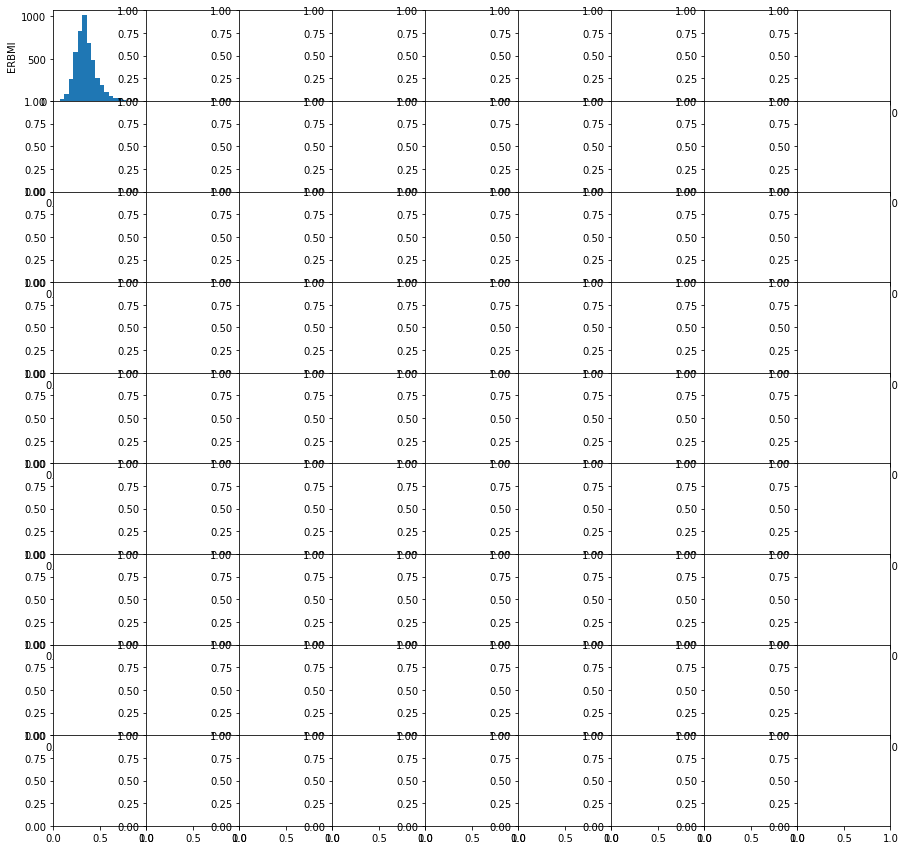

In [2407]:
grr = pd.plotting.scatter_matrix(merged_male_mean[cols_target + cols_ratio]
                                 ,c = dataSet_target
                                 ,figsize=(15, 15)
                                 ,marker = 'o'
                                 ,hist_kwds={'bins' : 20}
                                 ,s = 60
                                 ,alpha = 0.8)
plt.show()

In [2403]:
merged_male_mean.corr()

,TUCASEID,TEAGE,ERBMI,ERTPREAT,EUDRINK,EUEXERCISE,EUEXFREQ,EUFASTFDFRQ,EUFDSIT,EUGENHTH
TUCASEID,1.000000,0.007997,-0.015301,-0.015752,-0.016412,1.090337e-02,-1.011195e-02,-0.001940,-0.001338,0.001686
TEAGE,0.007997,1.000000,0.088721,0.076716,-0.095574,7.632283e-02,7.443480e-02,-0.068736,-0.018798,0.189951
ERBMI,-0.015301,0.088721,1.000000,-0.066250,-0.019089,1.219407e-01,-4.090901e-02,0.014417,0.011320,0.244717
ERTPREAT,-0.015752,0.076716,-0.066250,1.000000,0.004435,-8.005780e-02,-4.114082e-03,0.029288,-0.080773,-0.092068
EUDRINK,-0.016412,-0.095574,-0.019089,0.004435,1.000000,-9.457502e-03,-1.039613e-02,0.006118,-0.005400,-0.038224
EUEXERCISE,0.010903,0.076323,0.121941,-0.080058,-0.009458,1.000000e+00,9.148507e-17,0.020037,0.045916,0.241138
EUEXFREQ,-0.010112,0.074435,-0.040909,-0.004114,-0.010396,9.148507e-17,1.000000e+00,0.005254,0.002592,0.004380
EUFASTFDFRQ,-0.001940,-0.068736,0.014417,0.029288,0.006118,2.003707e-02,5.254079e-03,1.000000,0.035934,-0.007788
EUFDSIT,-0.001338,-0.018798,0.011320,-0.080773,-0.005400,4.591575e-02,2.592264e-03,0.035934,1.000000,0.141646
EUGENHTH,0.001686,0.189951,0.244717,-0.092068,-0.038224,2.411376e-01,4.380363e-03,-0.007788,0.141646,1.000000


In [2408]:
merged_female_mean.corr()

,TUCASEID,TEAGE,ERBMI,ERTPREAT,EUDRINK,EUEXERCISE,EUEXFREQ,EUFASTFDFRQ,EUFDSIT,EUGENHTH
TUCASEID,1.000000,0.005234,0.000824,-0.016198,-0.016483,7.024610e-03,3.709709e-03,-0.013241,-0.020701,0.008241
TEAGE,0.005234,1.000000,0.061853,0.059297,-0.092081,1.119932e-01,7.935015e-02,-0.092289,-0.011342,0.172059
ERBMI,0.000824,0.061853,1.000000,-0.040225,0.021356,1.652595e-01,-7.677206e-02,0.035806,0.069126,0.344387
ERTPREAT,-0.016198,0.059297,-0.040225,1.000000,0.019279,-7.935321e-02,3.112856e-02,0.007737,-0.063301,-0.069753
EUDRINK,-0.016483,-0.092081,0.021356,0.019279,1.000000,3.001789e-04,-4.276864e-03,-0.002247,0.031236,0.021286
EUEXERCISE,0.007025,0.111993,0.165260,-0.079353,0.000300,1.000000e+00,2.347977e-16,0.020673,0.083626,0.263951
EUEXFREQ,0.003710,0.079350,-0.076772,0.031129,-0.004277,2.347977e-16,1.000000e+00,-0.003239,0.007632,-0.062565
EUFASTFDFRQ,-0.013241,-0.092289,0.035806,0.007737,-0.002247,2.067337e-02,-3.239126e-03,1.000000,0.008680,-0.006884
EUFDSIT,-0.020701,-0.011342,0.069126,-0.063301,0.031236,8.362587e-02,7.631734e-03,0.008680,1.000000,0.226717
EUGENHTH,0.008241,0.172059,0.344387,-0.069753,0.021286,2.639513e-01,-6.256450e-02,-0.006884,0.226717,1.000000


In [2404]:
#y_pred = reg.predict(X)
#residual = y - y_pred
#plt.scatter(y_pred,residual)

In [2405]:
#list(df_meanF['EUHGT'][::])

#df_meanM[]df_meanM[]'EUHGT']<0

## Ansatz